<a href="https://colab.research.google.com/github/sakamototaisei/python_colab/blob/main/%E3%81%AF%E3%81%98%E3%82%81%E3%81%A6%E3%81%AE%E3%83%99%E3%82%A4%E3%82%BA%E7%B5%B1%E8%A8%88%E5%AD%A6PyMC3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **セクション1：ベイズ統計の概要**

## LaTeXの基礎

**LaTeXとは？**

Google Colaboratoryのテキストセルには、LaTeXという文書処理システムを使って数式を記述することができる

$$y = 2x+1$$

また、このように→$y=2x+1$　文章の中に数式を記述することもできる

様々な数式

--添字と累乗--
$$a_1, a_{ij}, b^2, b^{ij}, c_1^2$$

--多項式--
$$y=x^3+2x^2+x+3$$

--平方根--
$$y=\sqrt x$$

--三角関数--
$$y=\sin x$$

--分数--
$$y=\frac{17}{24}$$

--総和--
$$y=\sum_{k=1}^n a_k$$

--総乗--
$$y=\prod_{k=1}^n a_k$$

--行列--
$$\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}$$

# **セクション2：確率・統計の基礎**

## 確率の基礎

In [ ]:
# 乱数
import numpy as np

r_int = np.random.randint(6)
print(r_int)

NumPyのrandom.rand()関数を使うと、0から1までの小数をランダムに取得することできる

In [ ]:
r_dec = np.random.rand()
print(r_dec)

**均一な乱数**

random.rand()の引数に整数aを渡すと、小数をa個得ることができる

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y)
plt.grid()
plt.show()

**偏った乱数**

random.randn()関数は正規分布に従う乱数を返す、正規分布では、中央で確率が高く、両端で確率が低くなる

以下、コードは正規分布に従う多数の乱数をx座標、y座標として散布図にプロットしている

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
x = np.random.randn(n)
y = np.random.randn(n)

plt.scatter(x, y)
plt.grid()
plt.show()

**確率への収束**

以下コードではサイコロを何度も振って5が出た回数を数え、その推移を表示するコード

試行を重ねるにつれて、5が出た確率が16.7%に収束していくことを確認する

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = []
y = []
total = 0
num_5 = 0
n = 800

for i in range(n):
    if np.random.randint(6)+1 == 5: # 0-5までのランダムな数に1を加えて1-6に
        num_5 += 1
    total += 1
    x.append(i)
    y.append(num_5/total)

plt.plot(x, y)
plt.plot(x, [1/6]*n, linestyle='dashed') # yは1/6がn個入ったリスト
plt.grid()
plt.show()

## 基本的な統計量

**平均値**

*   平均値は、NumPy average()関数もしくはmean()関数により計算できる



In [ ]:
import numpy as np

x = np.array([55, 45, 60, 40])

print(np.average(x))

In [ ]:
print(x.mean())

**期待値**

*   得られる値の見込みと表現することができる
*   値と確率の席の総和として表される値Eは期待値を呼ばれる
*   平均値と期待値は同じ概念を表す



In [ ]:
p = np.array([0.8, 0.15, 0.05]) # 確率
x = np.array([10, 100, 1000]) # 値

print(np.sum(p*x)) # 期待値

**分散**

*   平均値との差の値を2乗して平均を取った値
*   NumPyのvar()関数で計算することができる



In [ ]:
x_1 = np.array([60, 40, 55, 54])
x_2 = np.array([48, 49, 52, 51])

# 分散の計算
print(np.var(x_1))
print(np.var(x_2))

**標準偏差**

*   分散の平方根を取ることで求められる
*   NumPyのstd()関数で計算することができる



In [ ]:
x_1 = np.array([60, 40, 55, 54])
x_2 = np.array([48, 49, 52, 51])

# 標準偏差の計算
print(np.std(x_1))
print(np.std(x_2))

## 正規分布

**ネイピア数のべき乗**

*   ネイピア数$e$は数学的に扱いやすい値なので、分布や確率を扱う際によく使われる
*   ネイピア数のべき乗$e^x$は、以下のように$exp$を使ってよく表される
$$exp(x)$$

NumPyではnp.eによりネイピア数を取得することができる。また、np.exp()関数によりネイピア数のべき乗を計算することができる


In [ ]:
print(np.e) # ネイピア数
print(np.exp(1)) # ネイピア数の1乗
print(np.exp(2)) # ネイピア数の2乗
print(np.e**2) # ネイピア数の2乗

ネイピア数を使った以下の式により、釣鐘乗の曲線を描くことができる
$$y = exp(-x^2)$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3) # 引数のに与えた間の50分割の値を取得
y = np.exp(-x**2)

plt.plot(x, y)
plt.show()

**正規分布**

*   自然界の様々な現象によく当てはまるデータの分布

以下コードで、確率密度関数を使って正規分布の曲線を描画する

平均値は0に固定し標準偏差を3通りにして3つの曲線を描画する



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pdf(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2 / (2*sigma**2)) # 確率密度関数

x = np.linspace(-5, 5)
y_1 = pdf(x, 0.0, 0.5)
y_2 = pdf(x, 0.0, 1.0)
y_3 = pdf(x, 0.0, 2.0)

plt.plot(x, y_1, label='σ: 0.5')
plt.plot(x, y_2, label='σ: 1.0')
plt.plot(x, y_3, label='σ: 2.0')
plt.legend()

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

標準偏差は値のばらつき具合を表すのですが、これが小さいと曲線の幅が狭くなり、大きいと幅がひろくなります

また、正規分布の曲線とx軸に挟まれた領域の面積は1になる。これは確率の総和が1であることに対応する

**正規分布に従う乱数**

*   正規分布に従う乱数は、NumPyのrandom.normal()関数を使って生成すすることができる
*   以下コードは、生成されたデータの分布をmatplotlibのhist()関数でヒストグラムとして表示する



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

s = np.random.normal(0, 1, 10000) # 平均0, 標準偏差1, 10000個

plt.hist(s, bins=25)

plt.xlabel('x', size=14)
plt.grid()

plt.show()

生成されたデータの分布は、釣鐘状の形状となっており、確率密度関数の形状とほぼ同じを確認できる

## 共分散と相関係数

**共分散**


*   2つのデータ間の関係を表す指標の1つ
*   $Cov(X, Y)$

$$Cov(X, Y) = \frac{1}{n}\sum_{k=1}^n (x_k-u_x)(y_k-u_y)$$



**相関係数**



*   2つのデータの関係の強さを-1から1の範囲で表す

$$ρ = \frac{Cov(X, Y)}{σ_xσ_y}$$


**相関係数の計算**

NumPyのcorrcoef()関数を使って計算することができる

corrcoef()関数の結果は2x2の行列として得られるが、右上と左下の要素が相関係数です

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([50, 70, 40, 60, 80]) # 英語
y = np.array([60, 80, 50, 50, 70]) # 国語

print('-- 相関係数: corrcoef関数を使用 --')
print(np.corrcoef(x, y))

plt.scatter(x, y)

plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.grid()

plt.show()

## 尤度



*   尤度とは、データの尤もらしさを表す
*   尤度は確率の積なので、0に限りなく近い値になる
*   そこで、尤度はしばしば対数の形で扱われる、値の大小の傾向は、対数の形であれば変わらない

$$log L = \sum_{k=1}^n log p(x_k) = n log(\frac{1}{σ\sqrt2π}) - \sum_{k=1}^n\frac{(x_k - μ)^2}{2σ^2}$$



**小さい尤度**

データと、確率密度関数を重ねてグラフに描画する

確率密度関数で使用する平均値μは0、標準偏差σは1とする

さらに、データがこの確率密度関数に従うとした場合の尤度と対数尤度を計算する

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([2.3, 1.0, 2.5, 3.1, 4.6])
y_data = np.zeros(5)

mu = 0
sigma = 1

# 確率密度関数
def pdf(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2 / (2*sigma**2))

x_pdf = np.linspace(-5, 5)
y_pdf = pdf(x_pdf, mu, sigma)

plt.scatter(x_data, y_data)
plt.plot(x_pdf, y_pdf)

plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.grid()

plt.show()

print('尤度: ', np.prod(pdf(x_data, mu, sigma))) # 尤度の計算
print('対数尤度: ', np.sum(np.log(pdf(x_data, mu, sigma)))) # 対数尤度の計算

上の正規分布で考えた時にx軸のデータが右側によっている

このことで対数尤度が-26になっている。つまり尤もらしくないデータだということがわかる


**大きい尤度**


*   確率密度関数で使用する、標準偏差と平均値を変更する0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([2.3, 1.0, 2.5, 3.1, 4.6])
y_data = np.zeros(5)

mu = np.average(x_data) # データの平均値
sigma = np.std(x_data) # データの標準偏差

# 確率密度関数
def pdf(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2 / (2*sigma**2))

x_pdf = np.linspace(-3, 8)
y_pdf = pdf(x_pdf, mu, sigma)

plt.scatter(x_data, y_data)
plt.plot(x_pdf, y_pdf)

plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.grid()

plt.show()

print('尤度: ', np.prod(pdf(x_data, mu, sigma))) # 尤度の計算
print('対数尤度: ', np.sum(np.log(pdf(x_data, mu, sigma)))) # 対数尤度の計算

上の正規分布で考えた時にx軸のデータが真ん中に集まっている

このことで対数尤度が-7になっていて先ほどより大きくなっている、つまり尤もらしいデータだということがわかる


# **セクション3：ベイズ統計の基礎**

## ベイズの定理

**条件付き確率とは**

*   ある出来事Bが起きたという条件のもとで別の出来事Aが起きる確率のことを条件付き確率
$$P(A|B)$$

条件付き確率は以下の式で求めることができます

$$P(A|B) = \frac{P(A∩B)}{P(B)}$$

P(B)はBが起きる確率で、P(A∩B)はAとBが同時に起きる確率

上記は、Bの中でAが起きたものの割合と解釈することができる

**例題**


*   袋の中に白い玉と赤い球が10個ずつ入っている
*   白い球のうち6つには0という数字が、4つには1という数字が書かれている
*   赤い球のうち4つには0という数字が、6つには1という数字が書かれている

この袋から玉を1つ取り出したら、白い玉でした。この白い球の番号が0であるある確率を求めてみよう

球の色は既にしろと分かっているので、確率を計算する際にはこのことを考慮する

$A$：番号が0である

$B$：白い球である

右辺の分母P(B)は白いためである確率なので、以下のように求めることができる

$$P(B) = \frac{10}{20}= \frac{1}{2}$$

右辺の分子、$P(A ∩ B)$ですが、袋の中に20個の玉があり、白くて番号が0の玉は6個なので以下のように求めることができる

$$P(A \cap B) = \frac{6}{20} = \frac{3}{10}$$

以上により条件付き確率を以下のように求めることができる

$$P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{\frac{3}{10}}{\frac{1}{2}} = \frac{3}{5}$$

取り出した玉が白である場合、その番号が0である確率は$\frac{3}{5}$、すなわち60%となる

**ベイズの定理とは**

$$P(B|A) = \frac{P(A|B)P(B)}{P(A)}$$

*   条件付き確率$P(B|A)$を、$P(A|B)$と$P(A)$と$P(B)$と使って求めている
*   Bが起きる確率P(B)は「事前確率」と呼ばれる、またAが起きたという条件のもとでBが起きる確率P(A|B)は「事後確率」と呼ばれる
*   ベイズの定理は、事前確率を事後確率に変換する式です

ベイズの定理は、$P(A|B)$は簡単に求まるが、$P(B|A)$が求まらない場合に役立つ

**ベイズの定理の活用例**

ある人が検査により陽性と判定された場合、実際に罹患している可能性は何%か計算する

*   全人類の0.01%が罹患している
*   検査により、実際に病気に罹患している人が陽性と判定される確率が98%
*   罹患していない人が陰性と判定される確率は90%

　ここで陽性と判定されることを$A_1$、陰性と判定ことを$A_2$とする

$$P(A_2) = 1 - P(A_1)$$

という関係がある

実際に罹患していることを$B_1$、罹患していないことを$B_2$とする

$$P(B_2) = 1 - P(B_1)$$

という関係がある

以上を踏まえてベイズの定理を以下のように使っていく

$$P(B_1|A_1) = \frac{P(A_1|B_1)P(B_1)}{P(A_1)}$$

左辺の$P(B_1|A_1)$が、陽性と判定された時実際に罹患している確率になる

$P(A_1|B_1)$は罹患している人が陽性と判定される確率なので、病気の特性から以下の通りとなる

$$P(A_1|B_1) = 0.98$$

$P(B_1)$は病気に罹患している確率なので、病気の特性から以下のようになる

$$P(B_1) = 0.0001$$

$P(A_1)$は陽性と判定される確率なので、罹患していて陽性と判定される確率と、罹患していなくて陽性と判定される確率の和により計算することができる

$$P(A_1) = P(B_1)P(A_1|B_1) + P(B_2)P(A_1|B_2) = 0.0001×0.98 + (1 - 0.0001) × (1 - 0.9) = 0.100088$$

以上により、$P(B_1|A_1)$を以下のように求めることができる

$$P(B_1|A_1) = \frac{P(A_1|B_1)P(B_1)}{P(A_1)} = \frac{0.98×0.0001}{0.100088} = 0.00097914$$

たとえ検査に陽性であっても、本当に罹患している確率は0.1%程度のようです。

ベイズの定理を用いたベイズ推定は、不確実な出来事を予測するために活用されている、例えば迷惑メールのフィルターやニュース記事のカテゴリ分類などに利用されている

## 最尤推定



*   データから尤度が最大になる確率分布のパラメータを求めることを「最尤推定」という

**尤度とパラメータ**

グラフを使って、正規分布を想定した際の尤度の最大値を確認する

以下のコードでは、平均値を固定して標準偏差を変化させた場合の、対数尤度の変化をグラフに表示している

対数尤度は以下の式で表す

$$logL = \sum_{k=1}^nlog p(x_k)$$


$μ$は平均値で、$σ$は標準偏差です


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([1.2, 2.3, 4.5, 1.9, 3.7]) # データ

mu = np.average(x_data)
sigma = np.std(x_data)

def pdf(x, mu, sigma): # 確率密度関数
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2 / (2*sigma**2))

def log_likelihood(p): # 対数尤度
    return np.sum(np.log(p))

x_sigma = np.linspace(0.5, 8) # 横軸：標準偏差を0.5から8まで変化させる
y_loglike = [] # 縦軸：対数尤度

for s in x_sigma:
    log_like = log_likelihood(pdf(x_data, mu, s))
    y_loglike.append(y_loglike) # 対数尤度を縦軸に追加

plt.plot(x_sigma, np.array(y_loglike))
plt.plot([sigma, sigma], [min(y_loglike), max(y_loglike)], linestyle='dashed')  # データを標準偏差の位置に縦線を引く

plt.xlabel('x_sigma', size=14)
plt.ylabel('y_loglike', size=14)
plt.grid()

plt.show()

上記のグラフで、横軸が標準偏差で縦軸が対数尤度で、点線はデータの標準偏差を表す

正規分布の標準偏差により対数尤度が滑らかに変化する様子を見ることができる

点線はデータの標準偏差を表しますが、この時縦軸の対数尤度は最大になっていることが確認できます

対数尤度が最大であることは、尤度が最大であることを意味する

このような最優推定により、データから最も妥当性の高い確率分布のパラメータを推定することができる

## PyMC3の基礎

**PyMC3**



*   ベイズ統計モデリングと確率的機械学習のためのPythonパッケージ
*   高度なマルコフ連鎖モンテカルロ法(MCMC)と変分推理(VI)アルゴリズムに重点を置く
*   柔軟で拡張性が高い



pymc3のインストール

In [ ]:
!pip install pymc3

PyMC3をインポートしてバージョンを確認します

In [ ]:
import pymc3 as pm

print(pm.__version__)

3.11.5


**確率分布**

使用できる確率分布クラスの一覧を取得します。

Pythonでは、dir()により変数や関数(属性)の一覧を取得することができます

In [ ]:
dir(pm.distributions)

['AR',
 'AR1',
 'AsymmetricLaplace',
 'BART',
 'Bernoulli',
 'Beta',
 'BetaBinomial',
 'Binomial',
 'Bound',
 'Categorical',
 'Cauchy',
 'ChiSquared',
 'Constant',
 'ConstantDist',
 'Continuous',
 'DensityDist',
 'Dirichlet',
 'DirichletMultinomial',
 'Discrete',
 'DiscreteUniform',
 'DiscreteWeibull',
 'Distribution',
 'ExGaussian',
 'Exponential',
 'Flat',
 'GARCH11',
 'Gamma',
 'GaussianRandomWalk',
 'Geometric',
 'Gumbel',
 'HalfCauchy',
 'HalfFlat',
 'HalfNormal',
 'HalfStudentT',
 'HyperGeometric',
 'Interpolated',
 'InverseGamma',
 'KroneckerNormal',
 'Kumaraswamy',
 'LKJCholeskyCov',
 'LKJCorr',
 'Laplace',
 'LogNormal',
 'Logistic',
 'LogitNormal',
 'Lognormal',
 'MatrixNormal',
 'Mixture',
 'MixtureSameFamily',
 'Moyal',
 'Multinomial',
 'MvGaussianRandomWalk',
 'MvNormal',
 'MvStudentT',
 'MvStudentTRandomWalk',
 'NegativeBinomial',
 'NoDistribution',
 'Normal',
 'NormalMixture',
 'OrderedLogistic',
 'OrderedProbit',
 'Pareto',
 'Poisson',
 'Rice',
 'Simulator',
 'SkewNormal

正規分布のオブジェクトを生成する

In [ ]:
mu = 2
sigma = 1

# 正規分布のオブジェクト
dist = pm.Normal.dist(mu=mu, sigma=sigma)
dist

正規分布に従う乱数を生成する

In [ ]:
dist.random(size=10) # 乱数10生成

array([1.31228739, 1.76725595, 3.18599536, 0.97300607, 1.40332773,
       1.98690914, 0.90048291, 0.91222564, 1.85843131, 2.53470634])

**統計モデルの生成**

with構文の中に記述した分布のオブジェクトは、統計モデルのオブジェクトと紐付く

In [ ]:
with pm.Model() as model:
    pm.Normal('x', mu=mu, sigma=sigma)

統計モデルの数式を確認する

In [ ]:
model

統計モデルから乱数を生成する

with構文でモデルを指定し、pm.sample()関数によりサンプリング結果を生成する

In [ ]:
with model:
    trace = pm.sample()

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


統計モデルにより生成された乱数を確認する

In [ ]:
trace['x'] # 乱数

array([2.07312552, 2.34868759, 2.34868759, ..., 1.8639779 , 1.22613231,
       1.61271846])

乱数の形状を確認する

In [ ]:
trace['x'].shape

(2000,)

**分布のグラフ表示**

seabornを使い、サンプリング結果をグラフで表示する

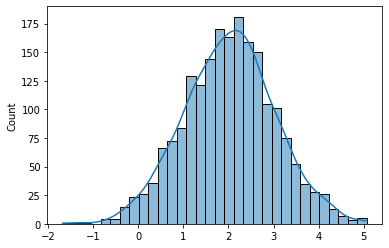

In [ ]:
import seaborn as sns


sns.histplot(trace['x'],
             stat='count', # 縦軸は出現回数
             kde=True) # 曲線の表示(kernel density estimation)

**データフレームへの変換**

pm.trace_to_dataframe()関数により、サンプリング結果をpandasのデータフレームに変換することができる

In [ ]:
df = pm.trace_to_dataframe(trace)
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,x
0,2.073126
1,2.348688
2,2.348688
3,2.970664
4,3.077065
...,...
1995,1.345453
1996,1.790648
1997,1.863978
1998,1.226132


# **セクション4：ベイズ統計の応用**

## ベイズ推定の実装

**ベイズ推定**

*   ベイズの定理を使った統計的推定方法
*   確率「分布」を推定することができる
*   新しいデータを使い、確率分布を更新していく「ベイズ更新」



例として、あるウェブサイトにおけるボタンのクリック確率を、分布として推定する

**ベイズの定理と確率分布**

ベイズの定理を確率分布に適用する

$$p(θ|r) = \frac{p(r|θ)p(θ)}{p(r)}$$

この式において、$θ$は確率分布のパラメータ、$r$は得られたデータです。

$p(θ)$は事前分布、$p(θ|r)$が事後分布、$p(r|θ)$尤度(尤度関数)と呼ばれる

$p(r)$は「正規化定数」などと呼ばれますが、$θ$を含まない定数となる

$p(r)$は事後分布$p(θ|r)$の値を0から1の範囲に納め、合計1にする、いわゆる「正規化」の役割を担います

**ベルヌーイ分布**

あるウェブサイトにボタンを配置します

このボタンがクリックされる確率をθ、クリックされることを1,クリックされないことを0とすると、条件付き確率を以下のように表すことができる

$$p(r = 1 | θ) = θ$$
$$p(r = 0 | θ) = 1 - θ$$

これらの式は、以下の表にまとめることができる

$$p(r|θ) = θ^r (1 - θ)^{1-r}$$

この確率分布は「ベルヌーイ分布」と呼ばれる

ベルヌーイ分布におけるパラメータθは、クリックされる確率なので0から1までの範囲をとる

今回は、このベルヌーイ分布を尤度として使います

**事前分布の用意**

今回は、ベイズ推定により、事後分布$p(θ|r)$を推定する

まずは、事前分布p(θ)を用意する

今回は、全く手がかりがないので確率変数によらず確率の値が一定な、一様分布を事前分布に使う

In [ ]:
import numpy as np

thetas = np.linspace(0, 1, 500) # パラメータ:0から1の範囲
p = np.ones(len(thetas)) / len(thetas) # 事前確率の分布:一様分布
print(p)

[0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.

**尤度を計算する関数**

ベイズの定理における尤度$p(r|θ)$を計算するための関数を用意する

今回は試行が一回のみのため、尤度はベルヌーイ分布で表すことができます

In [ ]:
def likehood(r):
    # ベルヌーイ分布
    if r == 1: # クリックされた場合
        return thetas
    else: # クリックされなかった場合
        return 1-thetas

**事後分布を計算する関数**

事後分布$p(θ|r)$を計算するための関数を設定する

事前確率の尤度の積をとり、正規化定数$p(r)$で割る

正規化定数は積分により数式の形で表せる場合もあるのですが、一般的に数式の形を求めるのは難しい

従って、今回は事前確率と尤度の積を、その総和で割ることで正規化する


In [ ]:
def posterior(r, prior):
    lipr = prior * likehood(r) # 事前確率と尤度の積
    return lipr / lipr.sum() # 正規化：事後分布の積を0から1の範囲に納め、合計1に

**事後分布の計算**

まずは、一回ボタンを表示して、クリックされた場合の事後分布を計算する

先ほど設定したposterior()関数に、クリックされたことを表す1と事前分布を渡す


In [ ]:
# 事後分布の計算：クリックした場合
p = posterior(1, p)
print(p)

[0.00000000e+00 8.01603206e-06 1.60320641e-05 2.40480962e-05
 3.20641283e-05 4.00801603e-05 4.80961924e-05 5.61122244e-05
 6.41282565e-05 7.21442886e-05 8.01603206e-05 8.81763527e-05
 9.61923848e-05 1.04208417e-04 1.12224449e-04 1.20240481e-04
 1.28256513e-04 1.36272545e-04 1.44288577e-04 1.52304609e-04
 1.60320641e-04 1.68336673e-04 1.76352705e-04 1.84368737e-04
 1.92384770e-04 2.00400802e-04 2.08416834e-04 2.16432866e-04
 2.24448898e-04 2.32464930e-04 2.40480962e-04 2.48496994e-04
 2.56513026e-04 2.64529058e-04 2.72545090e-04 2.80561122e-04
 2.88577154e-04 2.96593186e-04 3.04609218e-04 3.12625251e-04
 3.20641283e-04 3.28657315e-04 3.36673347e-04 3.44689379e-04
 3.52705411e-04 3.60721443e-04 3.68737475e-04 3.76753507e-04
 3.84769539e-04 3.92785571e-04 4.00801603e-04 4.08817635e-04
 4.16833667e-04 4.24849699e-04 4.32865731e-04 4.40881764e-04
 4.48897796e-04 4.56913828e-04 4.64929860e-04 4.72945892e-04
 4.80961924e-04 4.88977956e-04 4.96993988e-04 5.05010020e-04
 5.13026052e-04 5.210420

**事後分布の可視化**

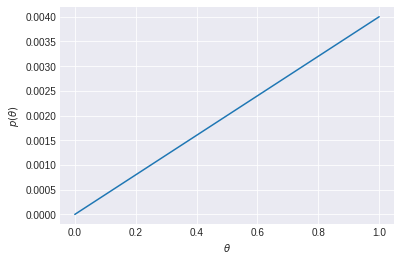

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()

また一回しかボタンが表示されていないので、分布は直線上になる

**ベイズ更新**

一回の結果が得られる度に、事後分布を更新する

ボタンが合計20回表示され、2回クリックされた後の事後分布を計算し可視化する

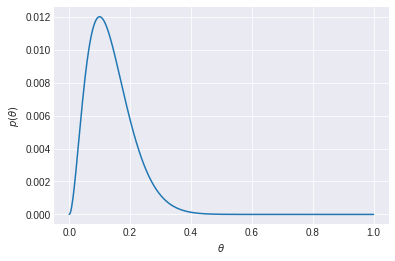

In [ ]:
n = 20
clicks = 2

# 事前分布
p = np.ones(len(thetas)) / len(thetas)

# クリックした場合
for _ in range(clicks):
    p = posterior(1, p)

# クリックしなかった場合
for _ in range(n-clicks):
    p = posterior(0, p)

plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()

確率分布にピークが出現した

データのクリック率は10%ですが、その付近が頂点となっている

試行を重ねると、どのように分布が変化するの確認する

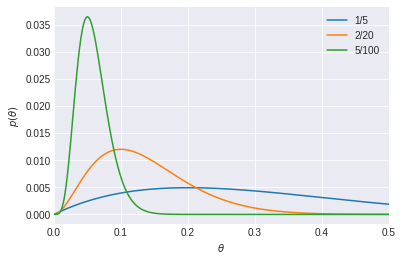

In [ ]:
def show_posterior(clicks, n):
    p = np.ones(len(thetas)) / len(thetas)
    for _ in range(clicks):
        p = posterior(1, p)
    for _ in range(n-clicks):
        p = posterior(0, p)
    plt.plot(thetas, p, label=str(clicks)+'/'+str(n))

show_posterior(1, 5)
show_posterior(2, 20)
show_posterior(5, 100)

plt.xlim(0, 0.5)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.legend()
plt.show()

試行回数が増えると、次第に分布の裾野が狭くなり推定の精度が向上することを確認できる

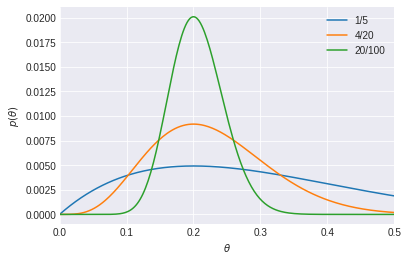

In [ ]:
def show_posterior(clicks, n):
    p = np.ones(len(thetas)) / len(thetas)
    for _ in range(clicks):
        p = posterior(1, p)
    for _ in range(n-clicks):
        p = posterior(0, p)
    plt.plot(thetas, p, label=str(clicks)+'/'+str(n))

show_posterior(1, 5)
show_posterior(4, 20)
show_posterior(20, 100)

plt.xlim(0, 0.5)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.legend()
plt.show()

## 二項分布の利用